# Dataset - Copy Memory Task 

- used to test how much information could be retained in RNN as the sequence grows longer
- Copy memory task input with delay T = 15
- Sequence symbols (8 in total): {0, 1, 2, 3, 4, 5, 6, 7}
- Blank symbol (1 in total): {8}
- Recall start signal (1 in total): {9}

## Example input:

x = [<span style="color:green">0, 1, 4, 5, 1, 4, 5, 3, 2, 6 </span>, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, <span style="color:red">9</span>, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

## Expected output

y = [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, <span style="color:green"> 0, 1, 4, 5, 1, 4, 5, 3, 2, 6</span>]

## Memory-less baseline results

- Output blank until the start prediction signal, and then output a random sequence of length 10

p_baseline = [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, <span style="color:green"> x, x, x, x, x, x, x, x, x, x</span>]

# Model - Vanilla RNN model 

## Architecture
- Vanilla RNN model with 1 layer and 1 direction
- Activation function: tanh()
- Number of hidden units: 128

## Training methods
- Backpropagation 
- TargetPropagation 

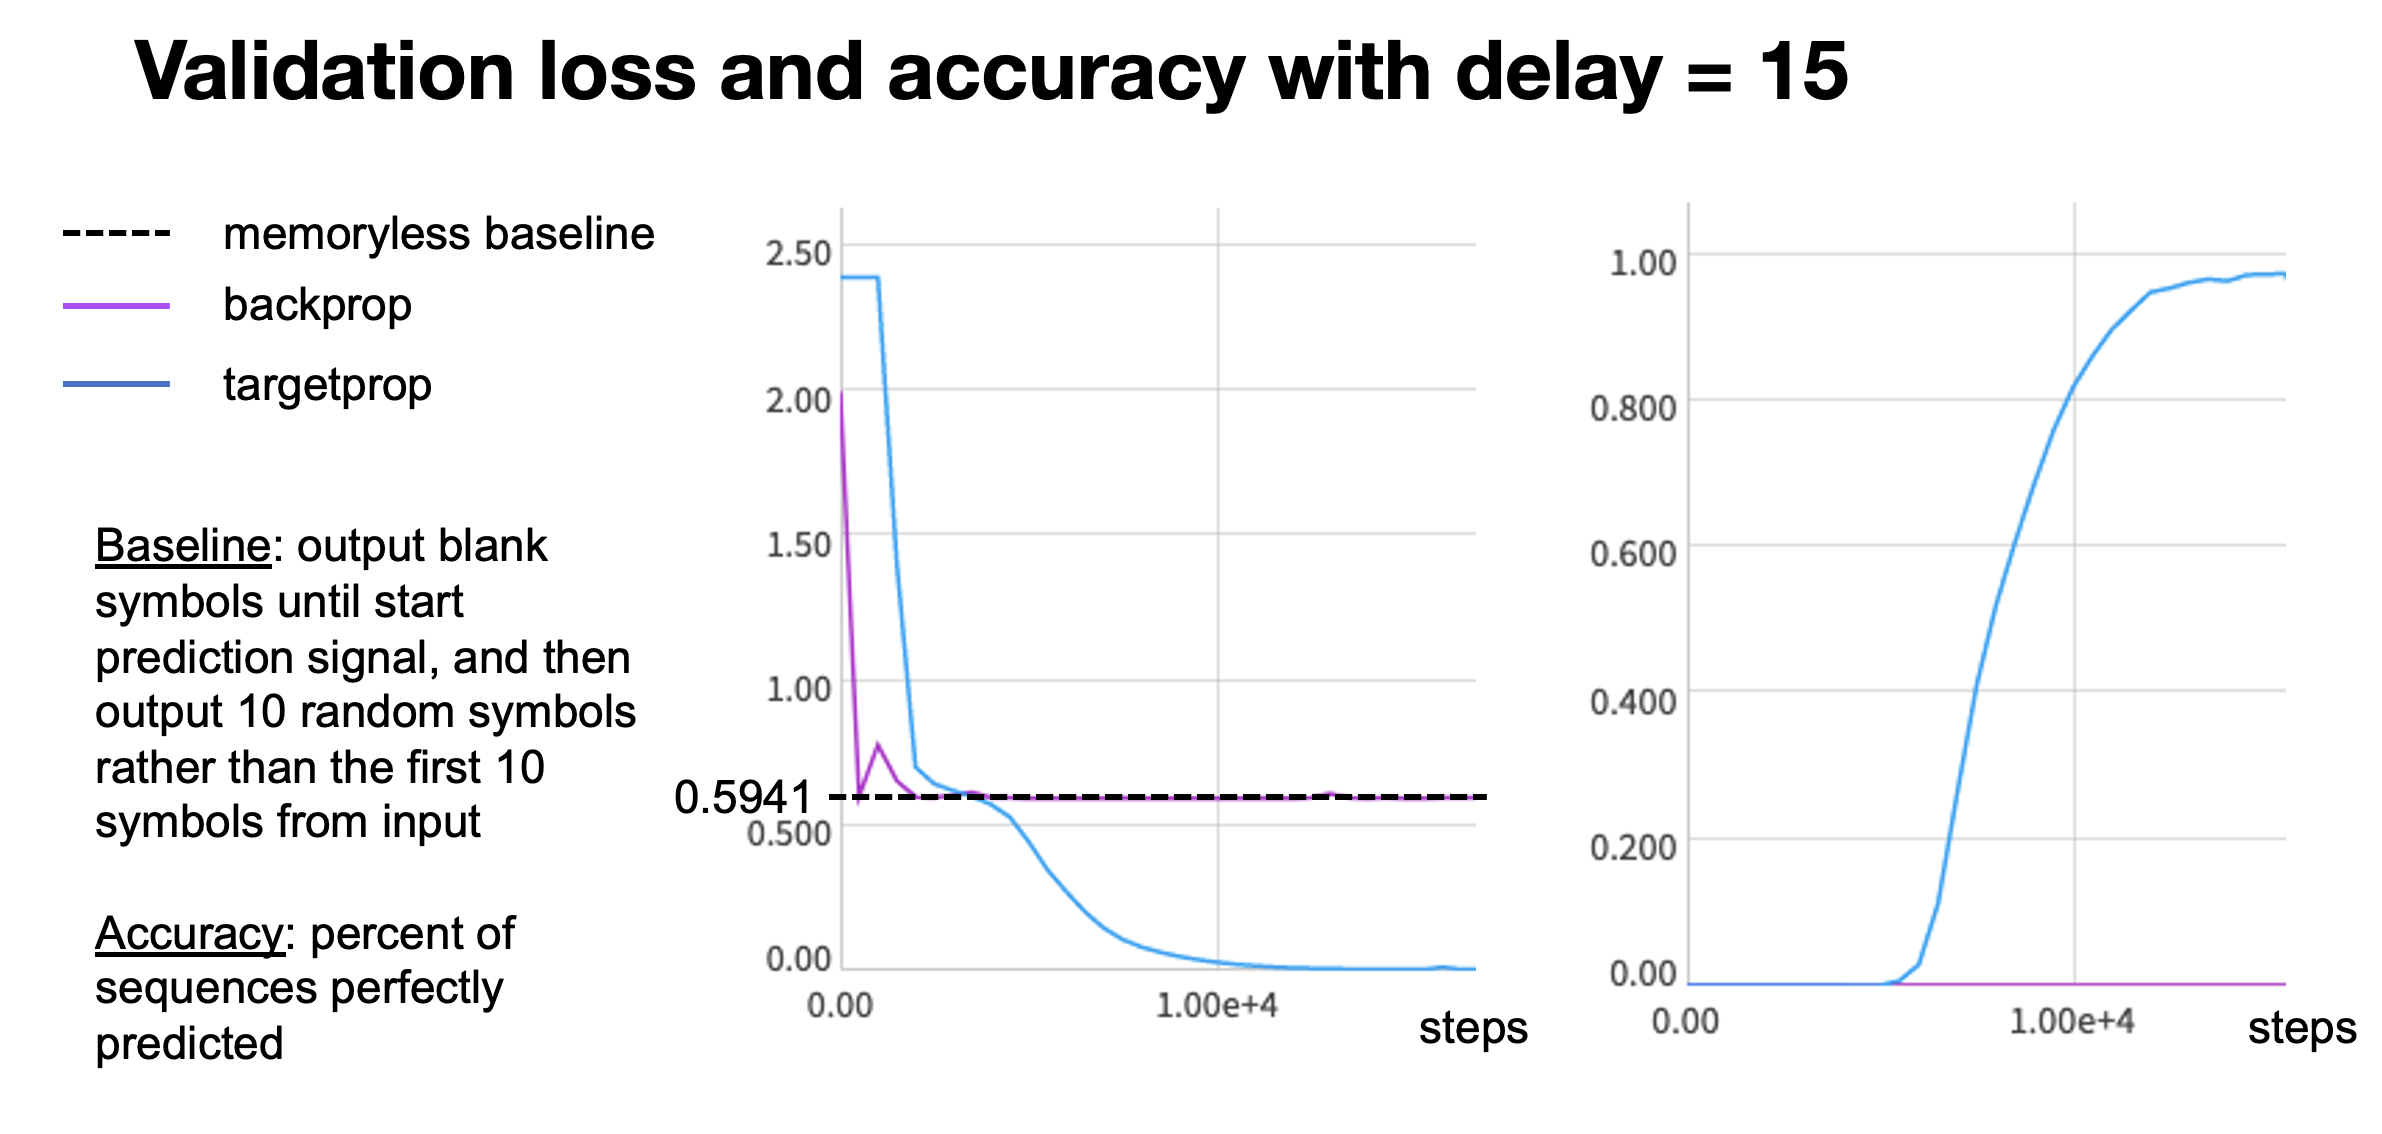

# Demo the outputs of the models 

In [50]:
import torch
from train_rnn import RNN
from datasets import prepare_loaders

In [51]:
bp_model = torch.load('15-bp.model')
tp_model = torch.load('15-tp.model')

In [55]:
_, data_loader = prepare_loaders('copymemory', 15, 1)
_, (x, y) = next(enumerate(data_loader))
x = x.to('cuda:0')
y = y.to('cuda:0')
print("Input sequence with delay T = 15")
print(x)
print("Expected output sequence with delay T = 15")
print(y)

Input sequence with delay T = 15
tensor([[7, 4, 2, 3, 6, 3, 3, 5, 1, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
         9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]], device='cuda:0')
Expected output sequence with delay T = 15
tensor([[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
         8, 7, 4, 2, 3, 6, 3, 3, 5, 1, 3]], device='cuda:0')


## Test backprop model

In [56]:
bp_model = bp_model.to('cuda:0')
bp_pred = bp_model(x)
bp_pred = torch.argmax(bp_pred, dim=0)
print("Output from backprop model:")
print(bp_pred)

Output from backprop model:
tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6], device='cuda:0')


## Test targetprop model

In [57]:
tp_model = tp_model.to('cuda:0')
tp_pred = tp_model(x)
tp_pred = torch.argmax(tp_pred, dim=0)
print("Output from target propagation model:")
print(tp_pred)

Output from target propagation model:
tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 7, 4, 2, 3, 6, 3, 3, 5, 1, 3], device='cuda:0')
